C:\Users\diego\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Full Model Output for Review: I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.
[{'label': 'negative', 'score': 0.9205968976020813}]
Full Model Output for Review: Bulk is always the less expensive way to go for products like these
[{'label': 'neutral', 'score': 0.6053089499473572}]
Full Model Output for Review: Well they are not Duracell but for the price i am happy.
[{'label': 'positive', 'score': 0.7650973796844482}]
Full Model Output for Review: Seem to work as well as name brand batteries at a much better price
[{'label': 'positive', 'score': 0.8743552565574646}]
Full Model Output for Review: These batteries are very long lasting the price is great.
[{'label': 'positive', 'score': 0.9762579798698425}]
Full Model Output for Review: Bought a lot of batteries for Christmas and the AmazonBasics Cell have been good. I haven't noticed a difference between the brand name batteries and the Amazon Basi

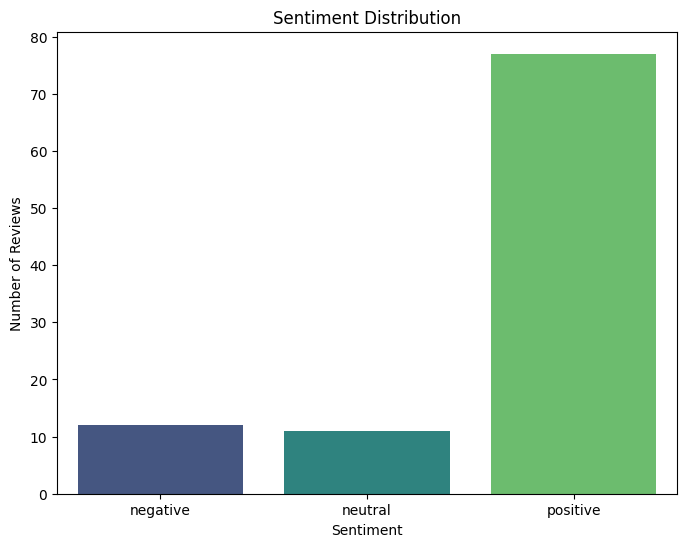

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import transformers
from transformers import pipeline, AutoTokenizer, logging

# Suppress unnecessary warnings from the transformers library
logging.set_verbosity_error()

# Step 1: Load the dataset
file_path = 'combined_amazon_reviews.csv'
data = pd.read_csv(file_path, low_memory=False)

# Step 2: Drop rows with missing or empty review text
data.dropna(subset=['reviews.text'], inplace=True)  # Drop rows where review text is NaN
data = data[data['reviews.text'].str.strip() != '']  # Drop rows where review text is empty

# For simplicity, use a subset for testing
data = data[['reviews.text']].head(100)  # Adjust as needed for testing

# Step 3: Load the tokenizer and sentiment analysis model
model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_name)
sentiment_analysis = pipeline("sentiment-analysis", model=model_name)



   # Step 4: Define a function to process and debug the sentiment analysis
def get_sentiment(review):
    try:
        # Tokenize and truncate the text
        tokens = tokenizer(review, truncation=True, max_length=512, return_tensors="pt")
        # Get sentiment prediction
        result = sentiment_analysis(tokenizer.decode(tokens['input_ids'][0], skip_special_tokens=True))
        
        # Print full model output for debugging
        print(f"Full Model Output for Review: {review}\n{result}")
        
        # Extract label from model output
        label = result[0]['label']
        
        
        return(label)
    except Exception as e:
        print(f"Error processing review: {review}\nError: {str(e)}")
        return "None"
    
    except Exception as e:
        print(f"Error processing review: {review}\nError: {str(e)}")
        return "None", 0.0

# Step 5: Apply the sentiment analysis model to each review and map the labels
data['sentiment'] = data['reviews.text'].apply(get_sentiment)

# Step 6: Display the results
print(data[['reviews.text', 'sentiment']].head())

# Step 7: Visualize sentiment distribution using countplot (corrected)
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=data, palette='viridis', hue='sentiment', dodge=False, legend=False)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

